In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Reading csv and dropping null data
BabyNames_df = pd.read_csv('BABY_NAMES_ALL_STATES.txt')
print(len(BabyNames_df))
BabyNames_df.dropna(inplace=True)
print(len(BabyNames_df))

6028201
6028151


In [3]:
# Build the main dataframe
# Extract the first initial and format year, count
BabyNames_df['NAMEINIT'] = BabyNames_df['NAME'].str[:1]
BabyNames_df['YEAR'] = BabyNames_df['YEAR'].astype(int)
BabyNames_df['COUNT'] = BabyNames_df['COUNT'].astype(int)
BabyNames_df.head()

# Create regions for the states and add REGION as a column in the df
def getregion(state_code):
    mw = set(["IL", "IN", "MN", "MO", "MI", "OH", "ND", "SD", "NE", "KS", "WI", "IA"])
    nw = set(["WA", "OR", "CA", "NV", "UT", "ID", "CO", "WY", "MT", "AK", "HI"])
    ne = set(["PA", "NY", "ME", "RI", "CT", "DE", "NH", "MD", "VT", "NJ", "MA", "DC"])
    se = set(["WV", "NC", "SC", "AL", "MS", "AR", "GA", "FL", "VA", "KY", "TN", "LA"])
    sw = set(["AZ", "NM", "OK", "TX"])
    
    if state_code in mw:
        return "MW"
    if state_code in nw:
        return "NW"
    if state_code in ne:
        return "NE"
    if state_code in se:
        return "SE"
    if state_code in sw:
        return "SW"

# Run thru the data frame and apply the found region to a new column    
len(BabyNames_df.iloc[:,0].apply(getregion))
BabyNames_df['REGION'] = BabyNames_df['STATE'].apply(getregion)

# Create bins in which to place years (WE MAY WANT TO MOVE THIS UP TO BOX 4)
bins = [1909, 1919, 1929, 1939, 1949, 1959,
       1969, 1979, 1989, 1999, 2009, 2019]

# Create labels for these bins
group_labels = ["1910s", "1920s", "1930s", "1940s", "1950s", "1960s",
               "1970s", "1980s", "1990s", "2000s", "2010s"]

BabyNames_df["DECADE"] = pd.cut(BabyNames_df["YEAR"], bins, labels=group_labels)
BabyNames_df.head()

,STATE,GENDER,YEAR,NAME,COUNT,NAMEINIT,REGION,DECADE
0,AK,F,1910,Mary,14,M,NW,1910s
1,AK,F,1910,Annie,12,A,NW,1910s
2,AK,F,1910,Anna,10,A,NW,1910s
3,AK,F,1910,Margaret,8,M,NW,1910s
4,AK,F,1910,Helen,7,H,NW,1910s


In [4]:
# What are the most popular baby names over the past 100 years.
# Male
males_BabyNames_df = BabyNames_df.loc[(BabyNames_df["GENDER"] == "M")]
# males_BabyNames_df.head()

# Female
females_BabyNames_df = BabyNames_df.loc[(BabyNames_df["GENDER"] == "F")]
# females_BabyNames_df.head()

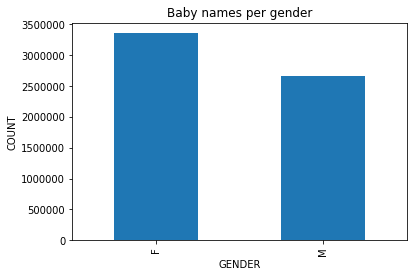

<Figure size 432x288 with 0 Axes>

In [5]:
# What are the total counts per gender
# BabyNames_df.GENDER.value_counts()

# Split up our data into groups based upon 'gender'
gender_groups = BabyNames_df.groupby('GENDER')

# Find out how many of each gender
gender_counts = gender_groups['GENDER'].count()

# Chart our data, give it a title, and label the axes
gender_chart = gender_counts.plot(kind="bar", title="Baby names per gender")
gender_chart.set_xlabel("GENDER")
gender_chart.set_ylabel("COUNT")
plt.savefig("plots/NamesPerGenderBar.png")
plt.show()
plt.tight_layout()

In [22]:
# What are the most popular male names in past 100 years?
ct_males = males_BabyNames_df.groupby(['NAME'])['COUNT'].sum().sort_values(ascending=False)
males_top = ct_males.head(20)
males_top
males_top_df = pd.DataFrame(ct_males).reset_index()
males_top_df.columns = ['NAME', 'COUNT']
males_top_df
top_20_males = males_top_df.loc[males_top_df["COUNT"]> 1272785]
top_20_males

,NAME,COUNT
0,James,4997327
1,John,4869607
2,Robert,4734038
3,Michael,4349307
4,William,3890923
5,David,3597725
6,Richard,2539873
7,Joseph,2522812
8,Charles,2273068
9,Thomas,2245124


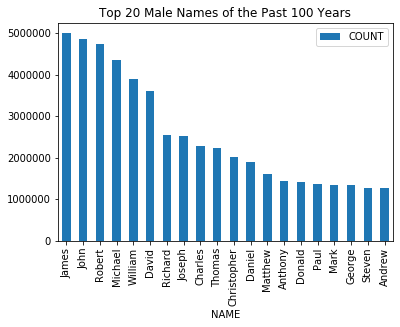

<Figure size 432x288 with 0 Axes>

In [25]:
# Chart our data, give it a title, and label the axes
# male_chart = top_20_males.plot(kind="bar", title="Top 20 Male names of past 100 years")
male_chart.set_xlabel("NAME")
male_chart.set_ylabel("COUNT")
# ax.set_xticklabels(top_20_males['NAME'], rotation=90)
ax = top_20_males.plot.bar(x='NAME', rot=90)
plt.title("Top 20 Male Names of the Past 100 Years")
plt.savefig("Top 20 Male Names of Past 100 Years.png")
plt.show()
plt.tight_layout()

In [26]:
# What are the most popular female names in the past 100 years?
ct_females = females_BabyNames_df.groupby(['NAME'])['COUNT'].sum().sort_values(ascending=False)
ct_females.head(20)
females_top_df = pd.DataFrame(ct_females).reset_index()
females_top_df.columns = ['NAME', 'COUNT']
females_top_df
top_20_females = females_top_df.loc[females_top_df["COUNT"]> 833583]
top_20_females

,NAME,COUNT
0,Mary,3741196
1,Patricia,1569022
2,Elizabeth,1537684
3,Jennifer,1466161
4,Linda,1447943
5,Barbara,1424221
6,Margaret,1130920
7,Susan,1109309
8,Dorothy,1053390
9,Jessica,1043442


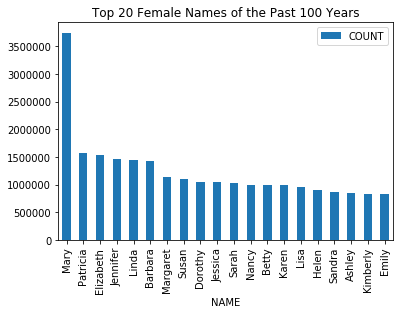

<Figure size 432x288 with 0 Axes>

In [29]:
# Filter = REGION >>> MIDWEST <<<
# female_chart = top_20_females.plot(kind="bar", title="Top 20 Female names of past 100 years")
female_chart.set_xlabel("NAME")
female_chart.set_ylabel("COUNT")
ax = top_20_females.plot.bar(x='NAME', rot=90)
plt.title("Top 20 Female Names of the Past 100 Years")
plt.savefig("Top 20 Female Names of Past 100 Years.png")
plt.show()
plt.tight_layout()

In [30]:
# Filter = REGION >>> SOUTHWEST <<<
BabyNames_filterRegion = BabyNames_df.loc[BabyNames_df["REGION"] == "SW", :]
# BabyNames_filterRegion

# Top (x) Names by REGION
Count_ByRegion = BabyNames_filterRegion.groupby(['REGION', 'NAME']).sum().sort_values(by="COUNT", ascending = False)
Count_ByRegion = Count_ByRegion[["COUNT"]]
Count_ByRegion.head(5)

COUNT
REGION NAME           
SW     James    403167
       John     347637
       Michael  347239
       Robert   334350
       David    328142

In [15]:
# Filter = REGION >>> SOUTHEAST <<<
BabyNames_filterRegion = BabyNames_df.loc[BabyNames_df["REGION"] == "SE", :]
# BabyNames_filterRegion

# Top (x) Names by REGION
Count_ByRegion = BabyNames_filterRegion.groupby(['REGION', 'NAME']).sum().sort_values(by="COUNT", ascending = False)
Count_ByRegion = Count_ByRegion[["COUNT"]]
Count_ByRegion.head(5)

COUNT
REGION NAME            
SE     James    1657253
       William  1150737
       Mary     1116674
       John     1090671
       Robert   1002143

In [16]:
# Filter = REGION >>> NORTHEAST <<<
BabyNames_filterRegion = BabyNames_df.loc[BabyNames_df["REGION"] == "NE", :]
# BabyNames_filterRegion

# Top (x) Names by REGION
Count_ByRegion = BabyNames_filterRegion.groupby(['REGION', 'NAME']).sum().sort_values(by="COUNT", ascending = False)
Count_ByRegion = Count_ByRegion[["COUNT"]]
Count_ByRegion.head(5)

COUNT
REGION NAME            
NE     John     1610769
       Robert   1413759
       Michael  1282439
       James    1145750
       William  1115340

In [17]:
# Filter = REGION >>> NORTHWEST <<<
BabyNames_filterRegion = BabyNames_df.loc[BabyNames_df["REGION"] == "NW", :]
# BabyNames_filterRegion

# Top (x) Names by REGION
Count_ByRegion = BabyNames_filterRegion.groupby(['REGION', 'NAME']).sum().sort_values(by="COUNT", ascending = False)
Count_ByRegion = Count_ByRegion[["COUNT"]]
Count_ByRegion.head(5)

COUNT
REGION NAME           
NW     Michael  691749
       Robert   601501
       David    600830
       John     545464
       James    508723

In [18]:
# What are the most popular initials in the past 100 years?
NameInt = BabyNames_df.groupby(['NAMEINIT'])['COUNT'].sum().sort_values(ascending=False)
# NameInt.head(10)
NameInt_df = pd.DataFrame(NameInt).reset_index()
NameInt_df.columns = ['NAMEINIT', 'COUNT']
NameInt_df.head(10)

,NAMEINIT,COUNT
0,J,41614734
1,M,29273903
2,A,25536651
3,C,22912372
4,D,21990354
5,R,21706789
6,S,19190946
7,L,16374479
8,B,15125966
9,K,14963457


In [20]:
# What are the most popular names in the J group
topJnames = BabyNames_df.loc[BabyNames_df["NAMEINIT"] == "J", :]
topJnames_df = topJnames.groupby(['NAME'])['COUNT'].sum().sort_values(ascending=False)
TopJnames_df = pd.DataFrame(topJnames_df).reset_index()
TopJnames_df.columns = ['NAME', 'COUNT']
TopJnames_df.head(10)

,NAME,COUNT
0,James,5015584
1,John,4885284
2,Joseph,2528437
3,Jennifer,1469039
4,Joshua,1209642
5,Jessica,1045544
6,Jason,1033169
7,Jeffrey,974892
8,Jacob,921600
9,Jonathan,838997


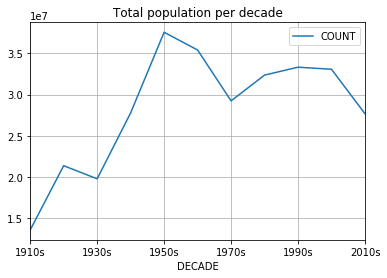

In [44]:
# What are the most popular names in decades group
pop_by_decade = BabyNames_df.groupby(['DECADE'])['COUNT'].sum().sort_values(ascending=False)
# pop_by_decade.head(10)

pop_by_decade_df = pd.DataFrame(pop_by_decade).reset_index()
pop_by_decade_df.columns = ['DECADE', 'COUNT']
# pop_by_decade_df

pop_by_decade_df.sort_values(by='DECADE').plot.line(x = 'DECADE', y = 'COUNT', grid="on")
plt.title("Total population per decade")
plt.savefig("Total pop per decade.png")

In [43]:
# What are the top names in the J category
topJnames = BabyNames_df.loc[BabyNames_df["NAMEINIT"] == "J", :]
topJnames_df = topJnames.groupby(['NAME'])['COUNT'].sum().sort_values(ascending=False)
TopJnames_df = pd.DataFrame(topJnames_df).reset_index()
TopJnames_df.columns = ['NAME', 'COUNT']
TopJnames_df.head(10)

,NAME,COUNT
0,James,5015584
1,John,4885284
2,Joseph,2528437
3,Jennifer,1469039
4,Joshua,1209642
5,Jessica,1045544
6,Jason,1033169
7,Jeffrey,974892
8,Jacob,921600
9,Jonathan,838997


In [32]:
# Filter = DECADE >>> 1910s <<<
BabyNames_filterDecade = BabyNames_df.loc[BabyNames_df["DECADE"] == "1910s", :]
# BabyNames_filterDecade

# Top (x) Names by DECADE
Count_ByDecade = BabyNames_filterDecade.groupby(['DECADE', 'NAME']).sum().sort_values(by="COUNT", ascending = False)
Count_ByDecade = Count_ByDecade[["COUNT"]]
# Count_ByDecade['COUNT'] = Count_ByDecade['COUNT'].astype(int)
Count_ByDecade.head(5)

COUNT
DECADE NAME             
1910s  Mary     479564.0
       John     377596.0
       William  303673.0
       James    275979.0
       Helen    248315.0

In [33]:
# Filter = DECADE >>> 1920s <<<
BabyNames_filterDecade = BabyNames_df.loc[BabyNames_df["DECADE"] == "1920s", :]
# BabyNames_filterDecade

# Top (x) Names by DECADE
Count_ByDecade = BabyNames_filterDecade.groupby(['DECADE', 'NAME']).sum().sort_values(by="COUNT", ascending = False)
Count_ByDecade = Count_ByDecade[["COUNT"]]
# Count_ByDecade['COUNT'] = Count_ByDecade['COUNT'].astype(int)
Count_ByDecade.head(5)

COUNT
DECADE NAME             
1920s  Mary     703805.0
       Robert   579203.0
       John     567279.0
       James    518204.0
       William  514581.0

In [34]:
# Filter = DECADE >>> 1930s <<<
BabyNames_filterDecade = BabyNames_df.loc[BabyNames_df["DECADE"] == "1930s", :]
# BabyNames_filterDecade

# Top (x) Names by DECADE
Count_ByDecade = BabyNames_filterDecade.groupby(['DECADE', 'NAME']).sum().sort_values(by="COUNT", ascending = False)
Count_ByDecade = Count_ByDecade[["COUNT"]]
# Count_ByDecade['COUNT'] = Count_ByDecade['COUNT'].astype(int)
Count_ByDecade.head(5)

COUNT
DECADE NAME             
1930s  Robert   592996.0
       Mary     575601.0
       James    549966.0
       John     490023.0
       William  418101.0

In [35]:
# Filter = DECADE >>> 1940s <<<
BabyNames_filterDecade = BabyNames_df.loc[BabyNames_df["DECADE"] == "1940s", :]
# BabyNames_filterDecade

# Top (x) Names by DECADE
Count_ByDecade = BabyNames_filterDecade.groupby(['DECADE', 'NAME']).sum().sort_values(by="COUNT", ascending = False)
Count_ByDecade = Count_ByDecade[["COUNT"]]
# Count_ByDecade['COUNT'] = Count_ByDecade['COUNT'].astype(int)
Count_ByDecade.head(5)

COUNT
DECADE NAME             
1940s  James    797845.0
       Robert   759631.0
       John     713107.0
       Mary     641864.0
       William  557441.0

In [36]:
# Filter = DECADE >>> 1950s <<<
BabyNames_filterDecade = BabyNames_df.loc[BabyNames_df["DECADE"] == "1950s", :]
# BabyNames_filterDecade

# Top (x) Names by DECADE
Count_ByDecade = BabyNames_filterDecade.groupby(['DECADE', 'NAME']).sum().sort_values(by="COUNT", ascending = False)
Count_ByDecade = Count_ByDecade[["COUNT"]]
# Count_ByDecade['COUNT'] = Count_ByDecade['COUNT'].astype(int)
Count_ByDecade.head(5)

COUNT
DECADE NAME             
1950s  James    845696.0
       Michael  838899.0
       Robert   831879.0
       John     799218.0
       David    770707.0

In [37]:
# Filter = DECADE >>> 1960s <<<
BabyNames_filterDecade = BabyNames_df.loc[BabyNames_df["DECADE"] == "1960s", :]
# BabyNames_filterDecade

# Top (x) Names by DECADE
Count_ByDecade = BabyNames_filterDecade.groupby(['DECADE', 'NAME']).sum().sort_values(by="COUNT", ascending = False)
Count_ByDecade = Count_ByDecade[["COUNT"]]
# Count_ByDecade['COUNT'] = Count_ByDecade['COUNT'].astype(int)
Count_ByDecade.head(5)

COUNT
DECADE NAME             
1960s  Michael  836401.0
       David    736000.0
       John     715756.0
       James    687461.0
       Robert   652996.0

In [38]:
# Filter = DECADE >>> 1910s <<<
BabyNames_filterDecade = BabyNames_df.loc[BabyNames_df["DECADE"] == "1970s", :]
# BabyNames_filterDecade

# Top (x) Names by DECADE
Count_ByDecade = BabyNames_filterDecade.groupby(['DECADE', 'NAME']).sum().sort_values(by="COUNT", ascending = False)
Count_ByDecade = Count_ByDecade[["COUNT"]]
# Count_ByDecade['COUNT'] = Count_ByDecade['COUNT'].astype(int)
Count_ByDecade.head(5)

COUNT
DECADE NAME                 
1970s  Michael      712353.0
       Jennifer     583104.0
       Christopher  477902.0
       Jason        464834.0
       David        447858.0

In [39]:
# Filter = DECADE >>> 1980s <<<
BabyNames_filterDecade = BabyNames_df.loc[BabyNames_df["DECADE"] == "1980s", :]
# BabyNames_filterDecade

# Top (x) Names by DECADE
Count_ByDecade = BabyNames_filterDecade.groupby(['DECADE', 'NAME']).sum().sort_values(by="COUNT", ascending = False)
Count_ByDecade = Count_ByDecade[["COUNT"]]
# Count_ByDecade['COUNT'] = Count_ByDecade['COUNT'].astype(int)
Count_ByDecade.head(5)

COUNT
DECADE NAME                 
1980s  Michael      668510.0
       Christopher  558078.0
       Jessica      470937.0
       Matthew      461007.0
       Jennifer     441993.0

In [40]:
# Filter = DECADE >>> 1990s <<<
BabyNames_filterDecade = BabyNames_df.loc[BabyNames_df["DECADE"] == "1990s", :]
# BabyNames_filterDecade

# Top (x) Names by DECADE
Count_ByDecade = BabyNames_filterDecade.groupby(['DECADE', 'NAME']).sum().sort_values(by="COUNT", ascending = False)
Count_ByDecade = Count_ByDecade[["COUNT"]]
# Count_ByDecade['COUNT'] = Count_ByDecade['COUNT'].astype(int)
Count_ByDecade.head(5)

COUNT
DECADE NAME                 
1990s  Michael      463647.0
       Christopher  360819.0
       Matthew      351959.0
       Joshua       329616.0
       Jessica      303533.0

In [41]:
# Filter = DECADE >>> 2000s <<<
BabyNames_filterDecade = BabyNames_df.loc[BabyNames_df["DECADE"] == "2000s", :]
# BabyNames_filterDecade

# Top (x) Names by DECADE
Count_ByDecade = BabyNames_filterDecade.groupby(['DECADE', 'NAME']).sum().sort_values(by="COUNT", ascending = False)
Count_ByDecade = Count_ByDecade[["COUNT"]]
# Count_ByDecade['COUNT'] = Count_ByDecade['COUNT'].astype(int)
Count_ByDecade.head(5)

COUNT
DECADE NAME             
2000s  Jacob    274028.0
       Michael  250905.0
       Joshua   232089.0
       Emily    223824.0
       Matthew  221648.0

In [42]:
# Filter = DECADE >>> 2010s <<<
BabyNames_filterDecade = BabyNames_df.loc[BabyNames_df["DECADE"] == "2010s", :]
# BabyNames_filterDecade

# Top (x) Names by DECADE
Count_ByDecade = BabyNames_filterDecade.groupby(['DECADE', 'NAME']).sum().sort_values(by="COUNT", ascending = False)
Count_ByDecade = Count_ByDecade[["COUNT"]]
# Count_ByDecade['COUNT'] = Count_ByDecade['COUNT'].astype(int)
Count_ByDecade.head(5)

COUNT
DECADE NAME              
2010s  Emma      177420.0
       Sophia    166996.0
       Olivia    165587.0
       Noah      164229.0
       Isabella  156722.0